<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-make-it-aesthetic/blob/master/MakeItAesthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make it Aesthetic

# Table of Content
 1 Introduction
 
 2 Goals and Use Cases
  
 2.1 Our Goals

 2.2 Use Cases

 3 Theory and Methods
 
 4 Process
 
 5 Literature

# 1 Introduction

Photos are taken for various reasons.

Someone wants to document some situations, others want to keep their experience in memory. And someone takes photos because of art reasons. 

Almost everybody makes photos but not every photograph fulfills the criteria of an aesthetic photo. To change this we aim to be able to make every photo aesthetic. To reach this goal it is necessary to define the rules of an aesthetic photo and to define which object is the main object of the photo. These goals are described in the following chapter.



# 2 Goals and Use Cases
## 2.1 Goals
* make given images aesthetic

* selecting the guideline the image should follow

* Rule of Thirds

* Diagonal Dominance

* Visual Balance

* Golden Ratio

* by zooming and rotation the image

## 2.2 Use Cases
* making photos more aethstic for an photo album or for a website
  * vacation
    * sightseeing photos of buildings
    * nature photos of landscapes and detailed plants
  * wedding and over big events photos of people
  * art photos of detailed motives
* let the algorithms editing all your photos instead of doing it manually

# 3 Theory and Methods

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAJ7LcNQXUT0an5uu2FO_uclWl8MCq0wINJNh3oLrs-shr3_Hb5A)


Golden Ratio

![alt text](https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fencrypted-tbn0.gstatic.com%2Fimages%3Fq%3Dtbn%3AANd9GcQDsh2JSGxEuiQueDxc8Nv3exWChiSh6WRxRrh_LeffSCXFbiysFA&sp=008dda95fde15b3ee8aea0de9351ca23&anticache=923965)


Diagonal Dominance

![alt text](https://ianfrithrn.files.wordpress.com/2012/05/reduced1.jpg)

#4 Process

Import of important packages

In [0]:
import numpy as np
import cv2
from skimage import io
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

Import of pictures

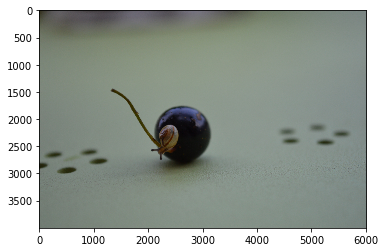

In [79]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/snail.JPG
img_snail = cv2.imread("snail.JPG") #gives the picture a variable
img_snail = cv2.cvtColor(img_snail, cv2.COLOR_BGR2RGB) #turns the color into the right color
plt.imshow(img_snail) #gives the picture out

Now we can see the image. The next step is to find out the size of the image in the x-axis (width of image) and in the y-axis (height of image). That happens with the **shape** function.

Now we can divide the width with 512 and the height with 512 by 3 to calculate the positions for the lines of the **Rule of Thirds**.

Now we calculated the position of the first line in the height of the image. Because the height of the image is equal to the width we already calculated the line in the width of the image. The second line will be at the position 170.666 + 170.666 = 341.332.

Now we are able to draw the line into the image with the **cv2.line()** function. Therefore we have to know to points: For 

In this function the photo will be preprocessed in the sense that it determines the size of the image. Therefore we use the **shape**-function of *open CV*. To calculate the first line for the RT it divides the height (resp. the width) of the photo by 3. Therefore the "//" operator is used since we need integer values for the further processing. For the second horizontal line the height is divided by 3 too but now the result is multiplied by 2. Similarly for the vertical line.


In [0]:
def generate_image_data(img):
  height = img.shape[0]
  width = img.shape[1]

  #calulating the lines for the rule of thirds
  third_of_height_1 = height // 3
  third_of_height_2 = (height // 3) * 2
  third_of_width_1 = width // 3
  third_of_width_2 = (width // 3) * 2
  return height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2


The following function called **draw_rule_of_thirds** is used to draw the lines of the *Rule of Thirds* (RT) on the given photo. The function requireds an object of type *img*, the colour the lines should appear and the line width for the RT-lines. It returns an object of type *img*.

After the preprocessing in the **generate_image_data** function we have all information to draw the RT-lines. Therefore we use the **axhline**-function of *matplotlib* for the horizontal lines and similarly the **axvline**-function for the vertical lines. Since we have images with different colours we have to draw the RT-lines in black or white depending on the average colour of the picture. To determine the average colour we add up all pixels of the gray version of the image and divide the sum by total amount of pixels of the image matrix.

At the end the function returns the photo with the RT-lines on it. The RT-lines are shown in a different layer as the image is shown. Since we do not want to have the line in the image later on.


In [0]:
def draw_rule_of_thirds(img):
  #calulating the height and width of the image and the lines for the rule of thirds
  width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(img)

  #calculating the average_brightness of the image
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  average_brightness = img_gray.sum() // (len(img_gray)*len(img_gray[0]))
 

  #define the line color in dependence of the brightness
  if average_brightness >= 129:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    plt.axhline(y = third_of_height_1, color = 'k')
    plt.axhline(y = third_of_height_2, color = 'k')
    #drawing the vertical lines
    plt.axvline(x = third_of_width_1, color = 'k')
    plt.axvline(x = third_of_width_2, color = 'k')
  else:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    plt.axhline(y = third_of_height_1, color = 'w')
    plt.axhline(y = third_of_height_2, color = 'w')
    #drawing the vertical lines
    plt.axvline(x = third_of_width_1, color = 'w')
    plt.axvline(x = third_of_width_2, color = 'w')
  return img

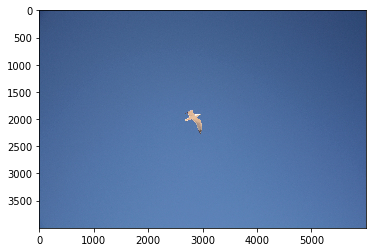

In [82]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/moewe.JPG
img_seagull = cv2.imread("moewe.JPG")
img_seagull = cv2.cvtColor(img_seagull, cv2.COLOR_BGR2RGB)
plt.imshow(img_seagull)

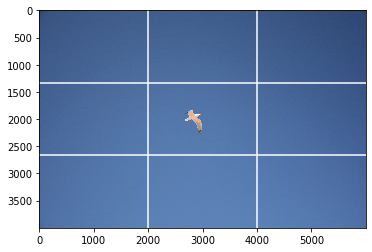

In [83]:
draw_rule_of_thirds(img_seagull)
plt.imshow(img_seagull)

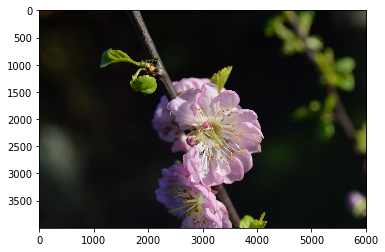

In [84]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/flower.JPEG
img = cv2.imread("flower.JPEG")
img_flower = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_flower)

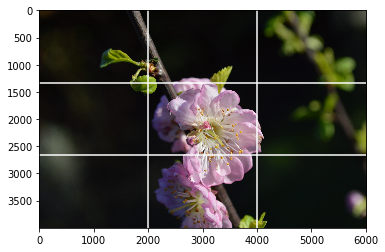

In [85]:
draw_rule_of_thirds(img_flower)
plt.imshow(img_flower)

### Calculation of the points of interests
Now we determine the **points of interest** by calculating the intersections of the lines.


In [0]:
def poi(img):
  width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 =generate_image_data(img)

  poi1 = tuple([third_of_height_1, third_of_width_1])
  poi2 = tuple([third_of_height_1, third_of_width_2])
  poi3 = tuple([third_of_height_2, third_of_width_1])
  poi4 = tuple([third_of_height_2, third_of_width_2])

  print(poi1)
  print(poi2)
  print(poi3)
  print(poi4)

In [87]:
poi(img_snail)

(1333, 2005)
(1333, 4010)
(2666, 2005)
(2666, 4010)


# Detect Horizons

Test by Konrad, erosion dilation

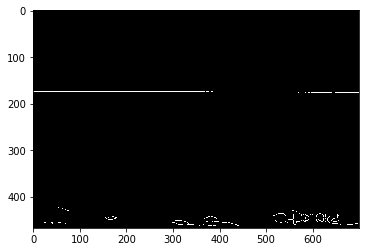

In [88]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/goodhorizon.jpg
img = cv2.imread('goodhorizon.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11,11),2)
edges = cv2.Canny(blur,50,150,apertureSize = 3)
plt.imshow(edges, 'gray')


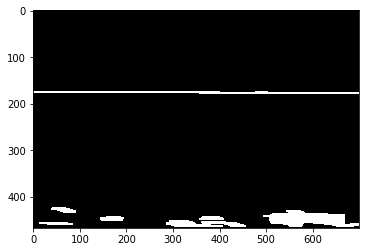

In [89]:
kernel = np.ones((2,10),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 3)
plt.imshow(dilation, 'gray')

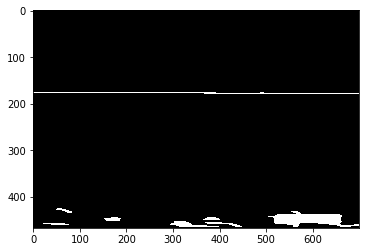

In [90]:
erosion = cv2.erode(dilation,kernel,iterations = 2)
plt.imshow(erosion, 'gray')

In [0]:
def detect_horizon(img):
  result = np.copy(img)
  #preprocessing of the image to detect lines
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (9,9),2)
  edges = cv2.Canny(blur,50,150,apertureSize = 3)
 

  #dilate and erose the binary image to extract better lines
  kernel = np.ones((2,10),np.uint8)
  dilation = cv2.dilate(edges,kernel,iterations = 3)
  erosion = cv2.erode(dilation,kernel,iterations = 2)

  #get the width of the image to calculate the minimal length of the line in the
  #image in dependence of the width of the image
  height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(dilation)
  
  #define the arguments for the function of the Hough Line Transformation
  rho = 1  # distance resolution in pixels of the Hough grid
  theta = np.pi / 180  # angular resolution in radians of the Hough grid
  threshold = 15  # minimum number of votes (intersections in Hough grid cell)
  min_line_length = int(width*0.05)  # minimum number of pixels making up a line
  max_line_gap = 80  # maximum gap in pixels between connectable line segments
  line_image = np.copy(img) * 0  # creating a blank to draw lines on

  # Run Hough on edge detected image
  # Output "lines" is an array containing endpoints of detected line segments
  lines = cv2.HoughLinesP(dilation, rho, theta, threshold, np.array([]),
                   min_line_length, max_line_gap)
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
        print(x1,y1,x2,y2)
        #draw the detected lines into the image
        image_line = cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        lines_edges = cv2.addWeighted(result, 0.8, line_image, 1, 0)
    return img, edges, dilation, erosion, image_line, lines_edges
  else: #if no lines are detected
    print("Konnte leider keine Linien erkennen.") 

In [0]:
def get_Coordinates_of_horizon(lines):
  start_point = tuple(lines[0][0],lines[0][1])
  last_row, last_column = lines.shape
  print(last_row)
  end_point = tuple(lines[n][2],lines[n][3])

0 176 699 176
0 175 663 175
286 458 699 458
0 444 195 444
0 445 196 445
282 456 669 450
0 177 699 177
6 459 85 456
507 446 670 443
506 444 670 438
294 452 410 448
295 460 699 460
7 457 74 455
7 459 91 459
6 461 91 461
0 174 505 174
298 462 699 462
380 178 699 178
508 453 670 453
48 463 85 463
511 437 670 437
294 450 403 443
46 447 196 447
0 442 125 440
395 429 443 430
147 450 194 450
548 433 583 433
553 434 667 436
390 426 434 426
513 436 661 436
494 439 670 442
345 464 571 464
571 179 699 179
514 435 578 430
18 457 85 457
40 428 86 427
390 423 434 423
39 424 77 424
122 441 188 442
144 448 196 448
36 458 85 458
360 444 397 441
390 425 434 425
523 445 670 440
507 449 669 449
508 454 670 454
544 446 669 446
509 438 650 438
39 426 82 426
303 463 689 463
390 427 436 427
282 457 699 457
390 422 427 422
282 454 404 444
392 428 441 428
282 455 669 455
494 440 669 444
293 459 451 459
0 441 90 429
297 461 699 461
333 456 699 456
56 430 91 430
361 443 396 441
507 447 651 452
39 425 78 425
355 44

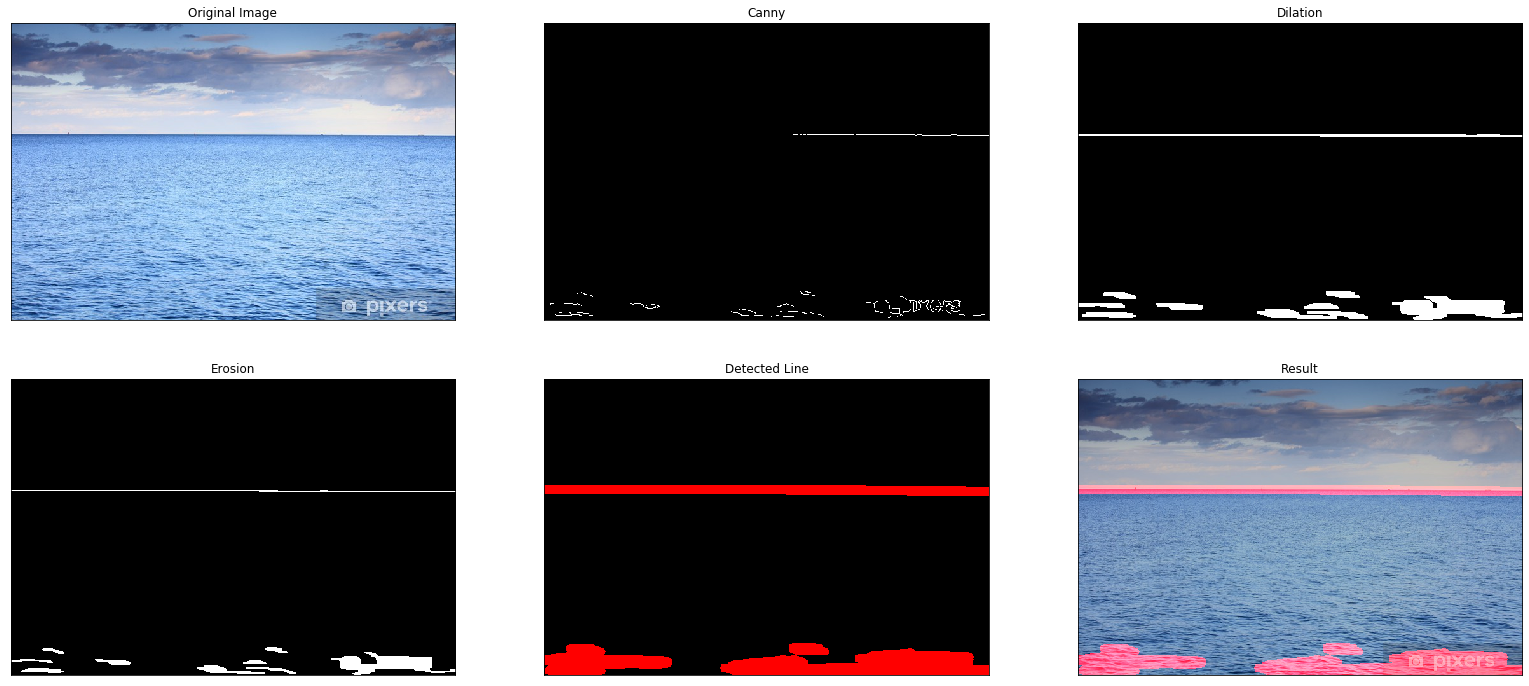

In [95]:
! wget -q https://raw.githubusercontent.com/.../Pictures/goodhorizon.jpg
img = cv2.imread('goodhorizon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
#get_Coordinates_of_horizon(lines)

35 623 873 623
4 622 99 622
478 614 871 621
956 623 1169 620
638 609 1181 600
47 627 348 627
526 625 873 625
37 624 873 624
531 633 697 633
526 626 873 626
527 629 875 629
478 615 872 622
985 628 1177 622
22 610 102 610
1027 613 1113 613
534 634 647 634
527 630 875 630
527 631 877 631
0 647 137 645
23 611 102 611
26 649 148 647
801 637 911 635
0 648 137 646
0 653 161 650
706 607 1194 607
622 612 902 612
528 632 714 632
44 630 129 633
0 618 103 616
817 638 895 638
1002 629 1184 623
492 614 821 614
45 641 133 641
46 640 132 640
901 605 1194 605
46 628 222 631
998 599 1148 596
44 642 135 642
45 633 142 638
46 639 134 639
99 653 165 652
0 644 137 644
44 632 143 635
785 636 911 634
903 603 1179 599
29 613 103 612
99 654 165 653
672 609 1111 609
99 655 165 654
22 608 101 608
970 628 1177 621
0 621 103 618
32 643 137 643
18 615 103 613
22 606 83 602
527 628 874 628
19 653 165 651
0 620 103 617
843 606 1194 606
1005 599 1149 597
46 635 136 638
618 615 824 615
1114 594 1177 598
478 616 841 622


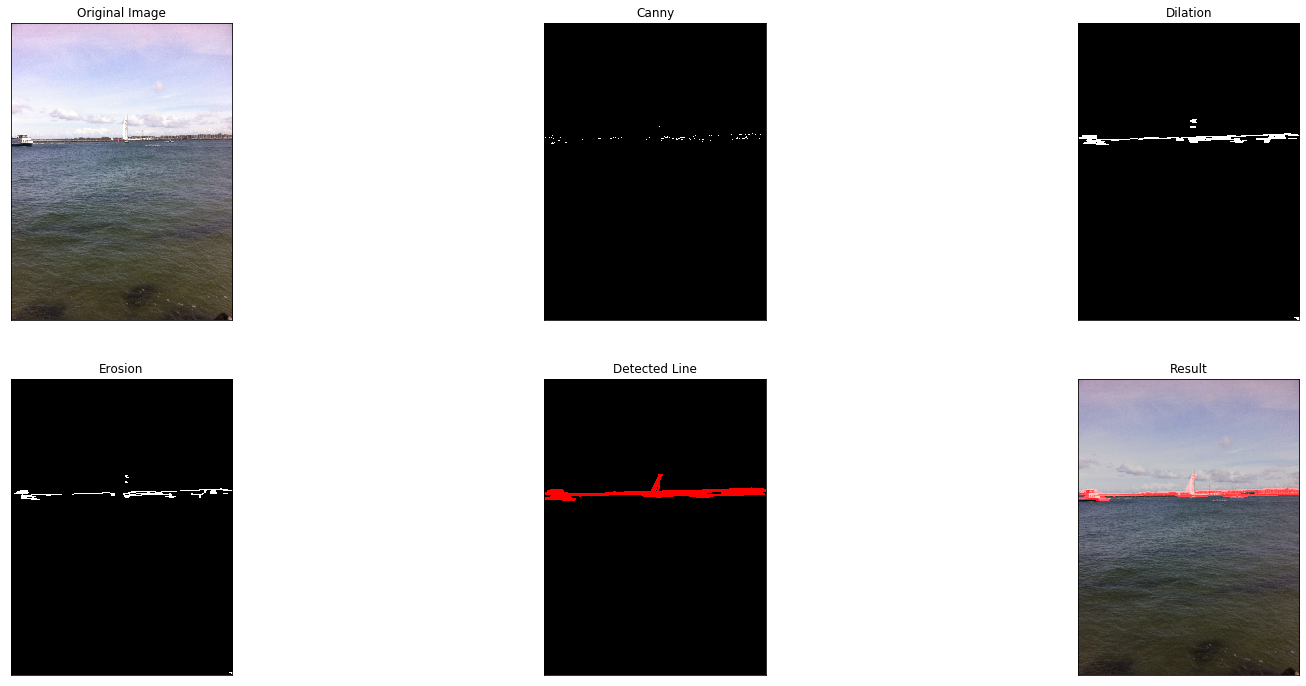

In [96]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex5.JPG
img = cv2.imread('ex5.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

682 2034 3436 2569
254 1955 4031 2689
316 1966 4031 2688
591 2018 4012 2683
48 2598 282 2623
968 2087 2861 2455
608 2952 881 2937
2212 2983 2695 2992
9 1914 681 2044
2394 2862 2976 2913
2452 2906 2734 2920
2491 2392 4031 2691
1492 2352 1996 2487
0 1909 1047 2112
1362 2791 1916 2791
982 2883 1814 2854
2626 2896 2908 2896
982 2825 1916 2792
1531 2919 1923 2939
508 2098 902 2203
1362 2785 1931 2785
2746 2585 3318 2635
2099 2992 2703 2982
981 3008 1250 2989
1443 2648 1937 2726
2794 2678 3329 2659
1040 2579 1599 2609
2743 2584 3330 2635
2214 2772 2511 2788
983 2833 1314 2845
1362 2893 1938 2883
1627 2942 1936 2953
2063 2999 2709 2987
777 2051 3298 2541
3472 2787 3754 2797
2112 2547 3073 2734
1151 3012 1948 3012
1151 3016 1948 3016
1040 2577 1595 2606
2739 2580 2964 2600
1151 3017 1945 3017
2212 2988 2699 2980
982 2894 1389 2908
982 2907 1389 2914
1151 3013 1948 3013
984 2585 1598 2617
1151 3014 1948 3014
982 2809 1419 2692
983 2739 1470 2756
1532 2914 1934 2935
36 2620 249 2627
3177 2527 40

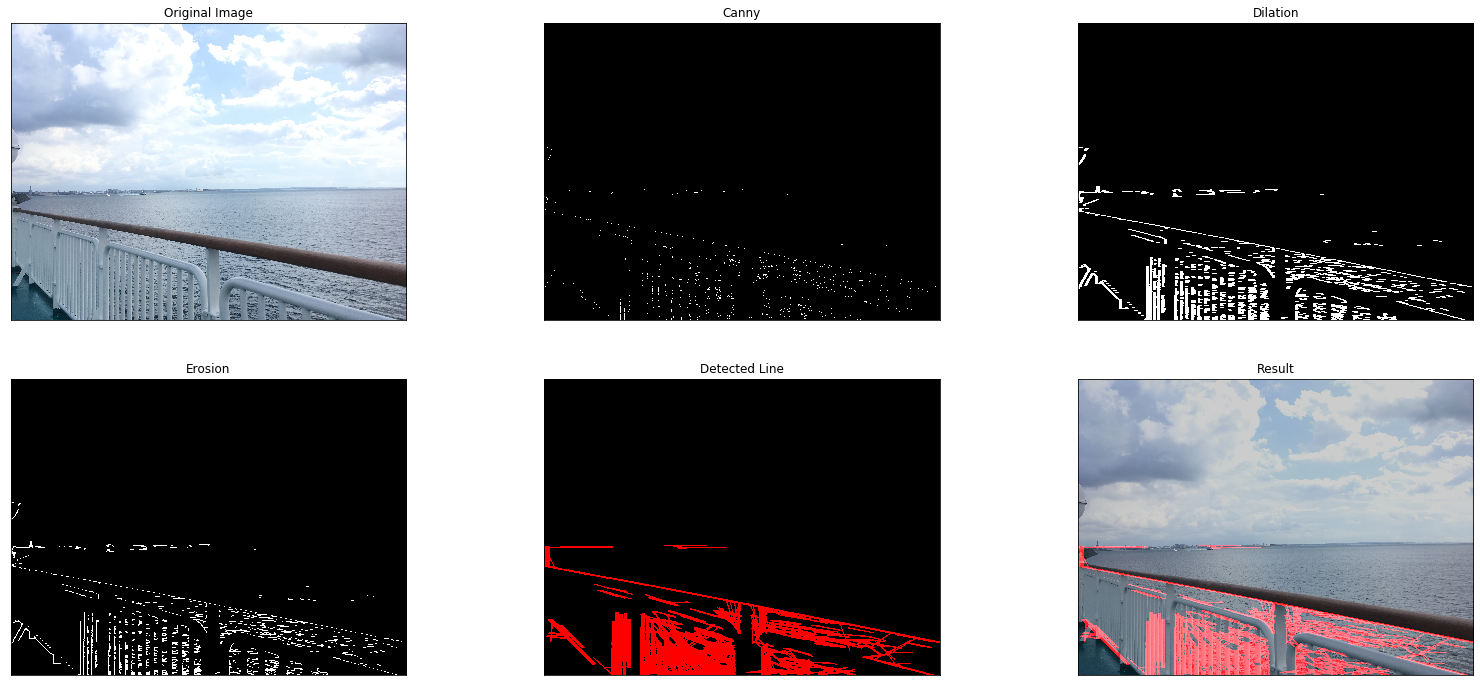

In [97]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex6.JPG
img = cv2.imread('ex6.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

814 1243 1707 1181
1575 1186 2375 1130
611 1256 2344 1135
1600 1183 2580 1114
1016 1227 2364 1132
2281 1132 2591 1110
1689 1175 2157 1143
799 1247 1692 1184
928 1239 1111 1227
229 1271 578 1247
2361 1124 2581 1109
574 1248 707 1252
24 1281 219 1264
246 1272 603 1248
2435 1891 2591 1933
1973 1230 2123 1222
2081 1285 2229 1282
219 1270 505 1250
1973 1228 2129 1219
37 1274 208 1262
2420 1893 2560 1913
36 1275 216 1263
2425 1892 2574 1921
933 1240 1111 1228
527 1259 801 1236
601 1255 811 1237
2087 1291 2229 1284
1988 1835 2125 1808
32 1281 224 1264
236 1271 590 1247
1984 1830 2127 1803
1986 1832 2127 1805
688 1671 831 1543
2081 1286 2220 1284
213 1269 361 1259
409 1265 611 1248
52 1271 189 1262
2412 1894 2563 1915
2087 1283 2229 1281
1990 1837 2120 1800
2342 1904 2517 1895
2091 1292 2227 1285
607 1256 814 1238
682 1669 835 1545
694 1671 828 1563
2343 1903 2516 1893
1974 1228 2129 1220
699 1671 830 1565
548 1259 805 1237
691 1672 833 1557
685 1667 836 1545
2432 1892 2574 1924
425 1265 606 1

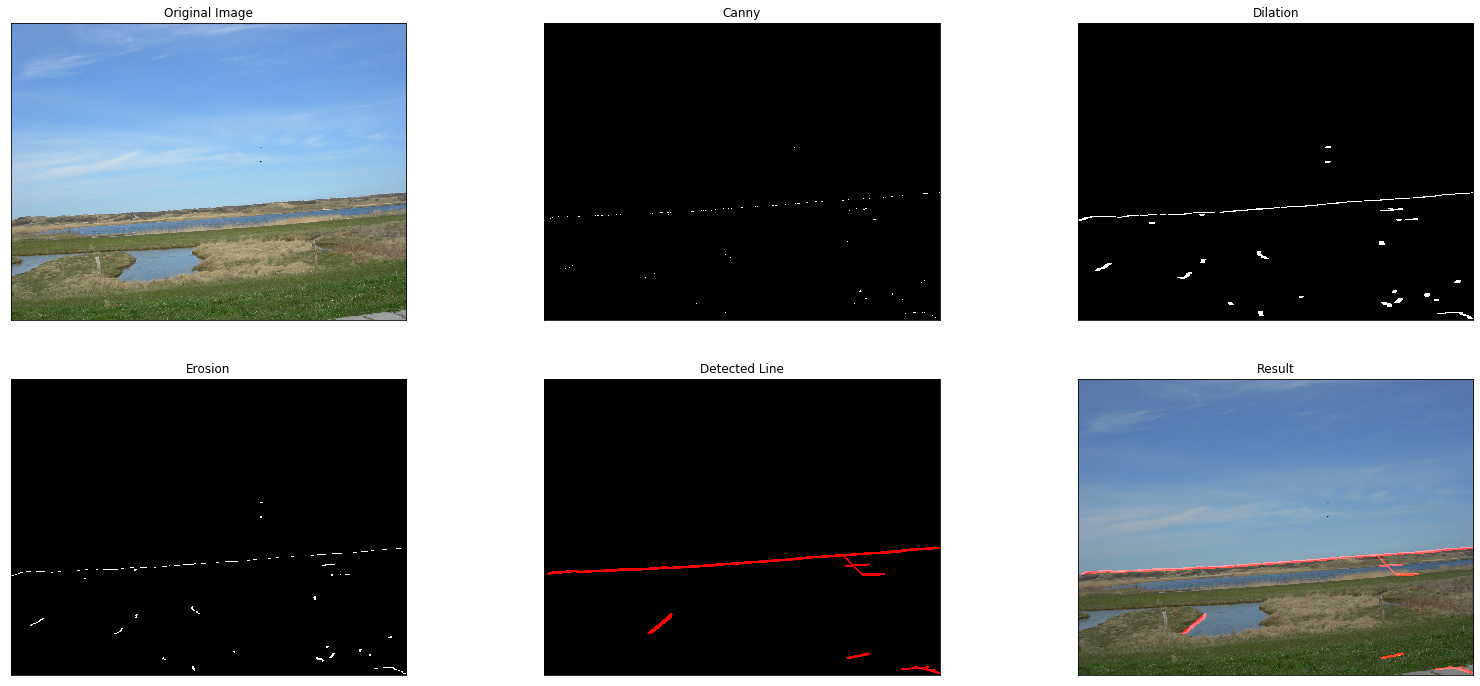

In [98]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/DSCN0053.jpg
img = cv2.imread('DSCN0053.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1747 1792 3482 1974
0 2013 783 2027
2592 1953 3525 2018
440 2078 728 2083
2718 2035 2984 2035
1140 1941 1536 1934
1738 1757 2107 1796
2650 1928 3161 1884
1032 1729 1233 1750
2129 1828 3108 1930
87 1863 1006 1911
1998 2507 2529 2507
2747 2040 3086 2046
3025 2014 3377 2020
3383 2053 3648 2058
487 1735 799 1762
2861 2049 3086 2049
553 1628 1175 1607
9 2013 783 2026
73 1867 344 1891
2883 2011 3303 2004
440 2085 713 2099
1739 1834 1994 1811
3543 2035 3794 2026
67 2091 783 2029
3367 2044 3765 2030
360 1865 749 1879
164 1781 435 1814
2768 2071 3128 2058
1845 2528 2208 2528
2787 2072 3124 2061
2 1997 383 2011
3371 2048 3651 2053
3514 2108 3822 2119
259 1636 1134 1606
0 2024 611 2056
2411 2099 2641 2095
87 1965 415 1971
880 2113 1226 2095
2671 1945 3205 1983
1984 1849 2814 1921
1290 2034 1518 2042
2768 2066 3128 2054
1289 2036 1509 2044
1786 2533 2315 2533
1338 1786 1587 1786
2006 1847 2555 1895
1967 2493 2578 2493
2590 1948 3293 1997
2041 1831 2987 1931
3372 2049 3629 2054
560 1728 790 1740
17

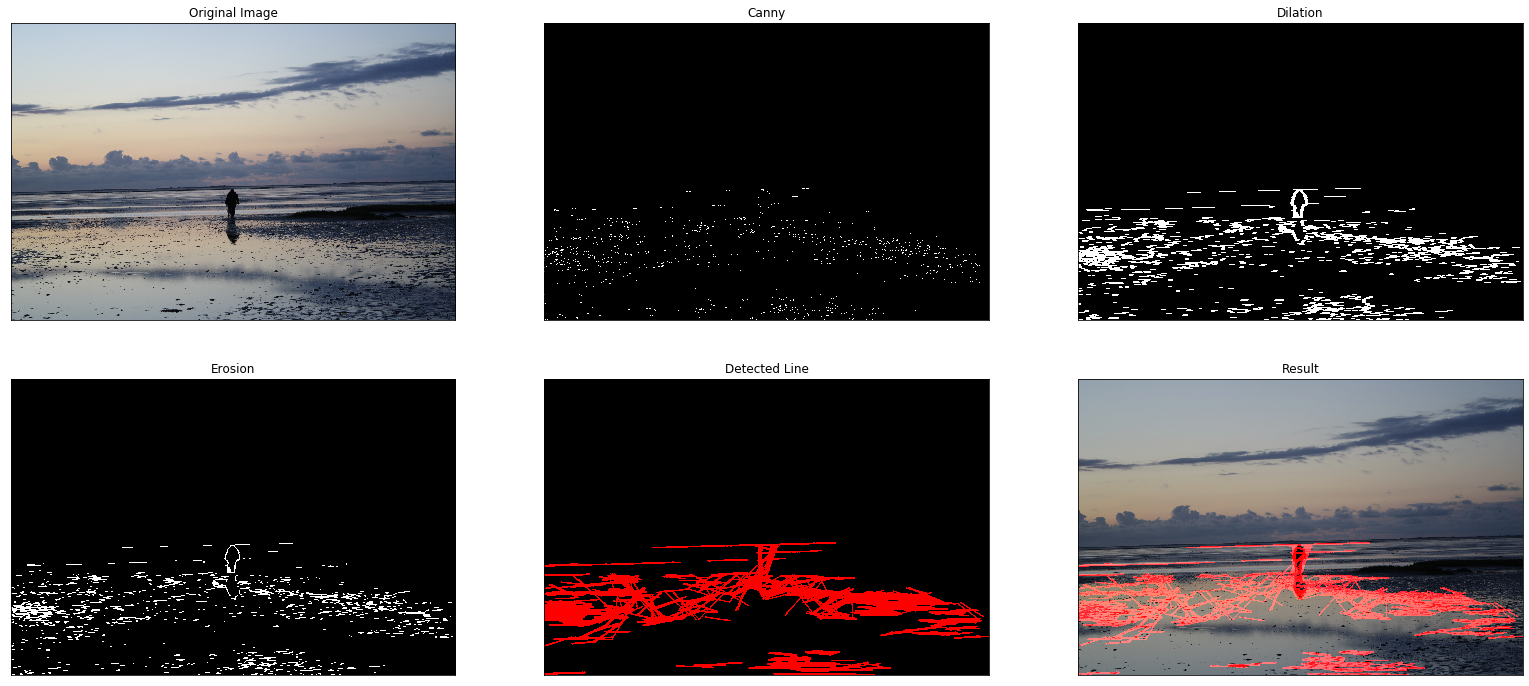

In [99]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach_oneperson.jpg
img = cv2.imread('beach_oneperson.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1676 1698 2997 1675
1005 1482 2137 1462
2329 1701 3023 1689
1627 1698 2997 1674
1504 1698 2997 1672
1796 1702 2998 1682
2001 1702 3019 1685
1017 1484 2579 1456
1787 1701 2998 1680
1504 1695 2924 1670
1507 1421 1970 1405
1775 1699 2998 1678
2000 1703 3022 1685
2134 1466 2576 1459
1504 1697 2994 1671
2313 1700 3023 1688
1505 1694 2923 1669
1769 1688 2923 1668
1744 1698 2998 1677
1807 1703 2998 1683
1685 1517 2600 1502
2309 1699 3023 1687
1149 1521 1833 1510
1840 1684 2104 1680
1538 1518 2323 1505
2027 1513 2620 1503
1423 1519 2221 1506
1204 1522 1984 1509
1641 1304 1866 1339
1525 1423 1959 1408
1652 1292 1873 1331
1647 1297 1872 1333
2359 1702 3015 1690
2476 1702 3010 1693
1148 1520 1624 1512
1641 1302 1868 1338
2692 1709 3011 1703
2166 1467 2570 1460
2476 1701 3011 1692
1813 1409 2245 1394
2691 1707 3011 1702
2729 1699 3010 1695
2709 1702 3010 1696
1527 1421 1967 1406
1813 1408 2245 1393
1661 1287 1998 1340
2691 1705 3010 1700
2693 1703 3010 1697
2290 1510 2620 1505
2692 1710 3016 1705


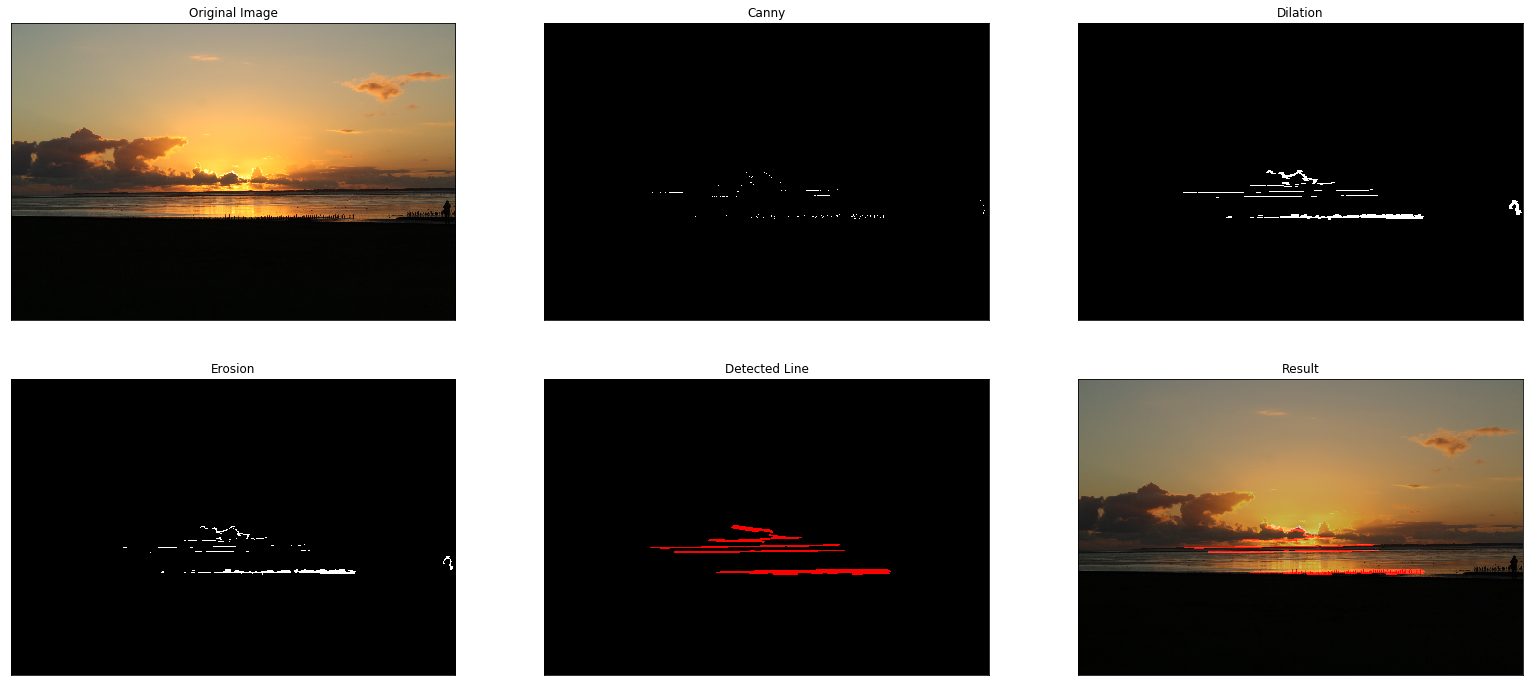

In [100]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach_sun.jpg
img = cv2.imread('beach_sun.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

2306 1889 3306 1924
1709 1853 3143 2055
41 1985 538 1976
194 1812 551 1818
1616 1946 2167 1974
495 1873 2416 1772
3257 1993 3460 1986
981 2087 1689 2087
3082 1746 3453 1740
2664 1979 2884 1987
36 1922 1544 2001
434 2163 922 2154
692 1708 2439 2242
2275 1742 2954 1707
714 1773 3101 2066
2512 2486 3604 2582
1794 2286 2450 2378
2121 2136 2723 2105
2563 2503 3238 2573
1684 2235 2245 2254
1414 2329 2374 2481
1712 2244 2376 2337
2140 1767 3521 1719
1155 2203 1944 2162
2109 2030 2926 2087
2732 2071 3073 2066
841 1855 1385 1846
1484 1931 2219 1892
2674 1971 3313 1927
325 2197 557 2201
630 2247 1023 2226
1150 1805 1989 1775
198 1789 884 1765
305 1844 965 1809
2598 2119 3259 2154
1669 2078 2374 2090
3655 1769 3877 1761
1643 2012 3114 1884
2733 2072 3186 2080
443 1725 1290 1740
1407 2341 1841 2441
1073 1802 1993 1770
2600 2126 3114 2134
612 1724 1058 1732
289 1363 1358 1307
910 1714 1988 1770
1458 2278 2069 2299
2804 2096 3179 2090
1914 1844 3036 1805
1902 2056 2434 2075
3182 2107 3692 2115
1257 

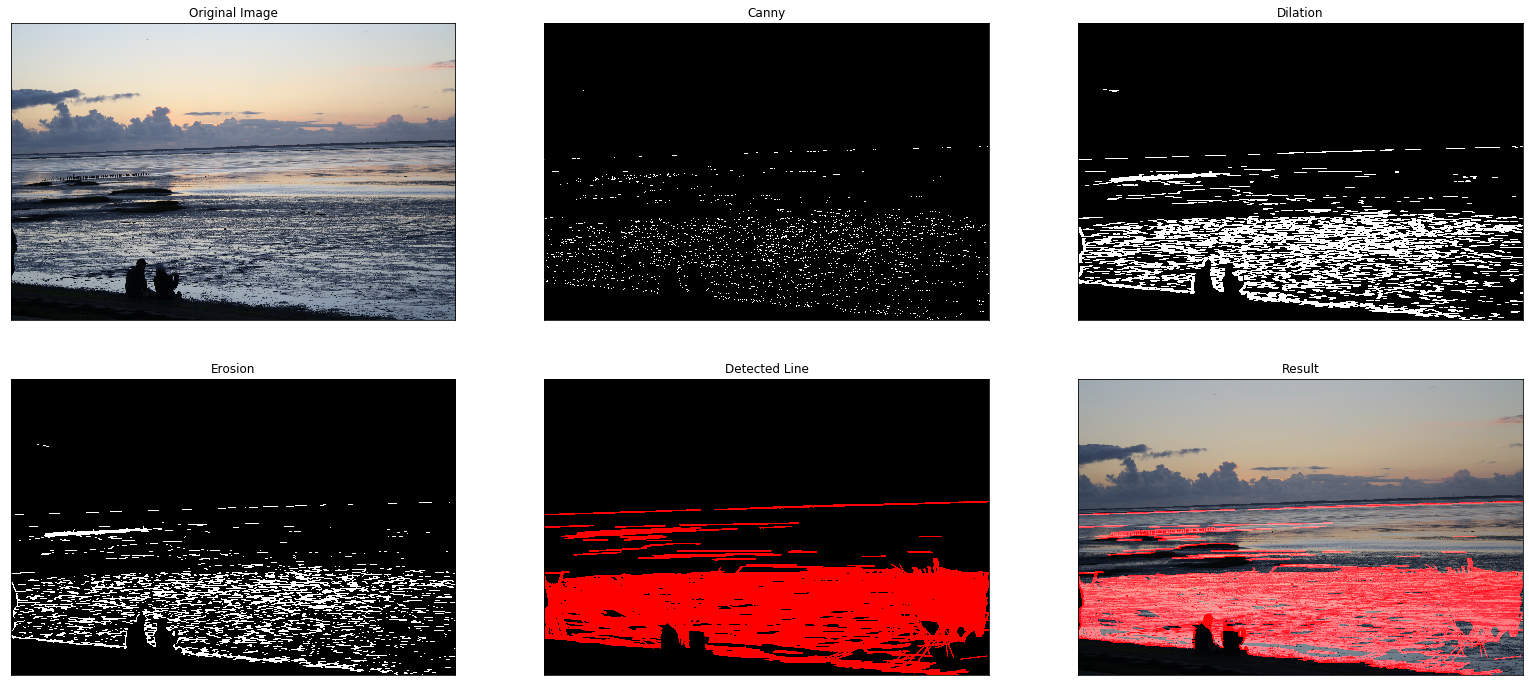

In [101]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach_twopeople.jpg
img = cv2.imread('beach_twopeople.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

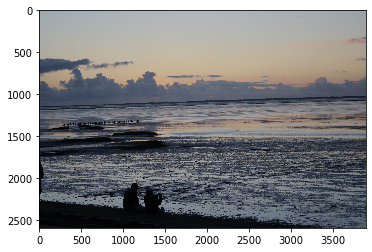

In [102]:
# Draw the lines on the  image
line_image = np.copy(img)*0
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(lines_edges, 'gray')

# Detect Circles

[[[401.5 236.5 150.1]]]


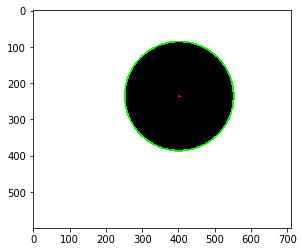

In [103]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/circle.png
img = cv2.imread('circle.png')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
median = cv2.medianBlur(gray, 5)
plt.imshow(median, 'gray')

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 1, 30, param1=50, param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
print(circles)
for (x, y, r) in detected_circles[0,:]:
  img_circle = cv2.circle(output, (x, y), r, (0, 255, 0), 3)
  cv2.circle(output, (x, y), 2, (255, 0, 0), 3) 

plt.imshow(img_circle)



[[[2396 2252  149]
  [2458 2356  268]
  [2292 2316  266]
  [2096 2178  372]
  [2110 2012  258]
  [2214 2198   87]
  [2238 2726   24]
  [2076 2572   23]]]


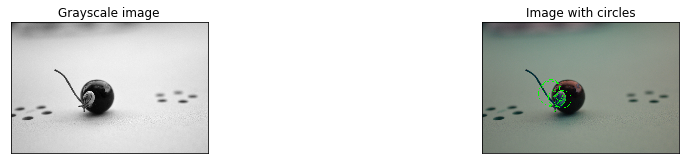

In [104]:
! wget -q https://raw.githubusercontent.com/.../Pictures/grafik.png
img = cv2.imread('snail.JPG')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 0.9, 120, param1=50, 
                           param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
print(detected_circles)
for i in circles[0,:]:
  #draw the outer circle
  img_circle = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 10)
  #draw center of circle
  img_center = cv2.circle( img, (i[0], i[1]), 2, (0, 0, 255), 5)

titles = ['Grayscale image', 'Image with circles']
rt_circle = draw_rule_of_thirds(img_circle)
images = [gray, img_circle, rt_circle]

plt.imshow(img_circle)
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i], 'gray')
    plt.subplots_adjust(left=1.0, bottom=1.0, right=3.0, top=2.0)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()